## 군집합 분석 -> k-평균 알고리즘(군집합) 분석
### 샘플데이터 - 온라인 판매 데이터 : 영국 특정 쇼핑몰의 샘플 데이터 기반
### UCI레포지토리에서 다운 받을 예정 (https://archive.ics.uci.edu/)
### 분석 모델 구축 : 사이킷런의 내부에 있는 패키지를 이용하고 있음.
### 구글, 메타, 파이썬의 내장 패키지 등 오픈소스를 이용하고 있음

## 용어정리
### 비지도 학습 : 쉽게 말해서 답이 없는 학습을 시켜서 학습된 모델을 이용해서 예측값, 실제값을 비교.
## 간단한 프로세스
### x(훈련데이터) -> 머신러닝 프로그램 -> 학습 모델 -> 클러스터(군, 집합, 분류)
### 새로운 데이터 -> 학습 모델 -> 예측 레이블 (타겟, 결과 등)
### 예1)쇼핑몰 소비패턴을 파악하는 비지도 학습 모델링
### 예2)겨울 1월 시즌에는 어떤 물품이 많이 구매가 되었는지 연령층 별로 구매 패턴 분류
### 예3)30~40대가 책을 많이 구매했고, 식료품에 다이어트 식품들이 구매가 많이 되었다..라는 데이터가 도출되면 그것을 이용해서 광고할 수 있음

### k-평균 알고리즘
### k개의 클러스트(집합)를 구성한다. k개의 중심점을 임의의 위치로 잡고 중심점울 기준으로 가까이 있는 데이터를 확인한 뒤, 그들과의 거리의 평균지점을 중심으로 이동한다.
### 계속 반복해서 데이터 분포를 최적화 한다. ->삼각형 모양으로 중심점 표기
### 문제 : 임의의 클러스터의 k개의 최적 갯수를 찾는 부분이 문제점
### 해결책 : 가장 좋은  k를 찾기위한 방법으로 엘보방법, 실루엣 방법 사용예정

### 엘보방법 : 클러스터의 중심점과 클러스터 내의 데이터 거리 파이의 제곱값 합 -> 왜곡이라고 부름
### 선이 급격히 꺾이는 지점이 있음. 그 지점이 엘보(팔꿈치). 값을 최적의 k값으로 사용함 -> 그래프로 꺾이는 지점

### 실루엣 방법 : 클러스터의 갯수를 얼마로 정할지를 지정해 주는 분석 방법
### 클러스터 내에 있는 데이터가 얼마나 조밀하게 모여있는지 측정하는 도구
### 데이터 i가 해당 클러스터(군, 집합)내의 데이터와 얼마나 가까운지... -> 응집력 a(i)
### 가장 가까운 다른 클러스터 내의 데이터와 얼마나 떨어져 있는지... -> 분리도 b(i)
### 실루엣 계수 s(i) -> = (b(i) - a(i)) / max(a(i), b(i))
### 실루엣 계수의 결과값은 -1 < s(i) < 1,  결론 : 1에 가까울 수록 좋은 군집합

### 샘플 데이터 받기
### UCI 레포지토리 : Online Retail

In [1]:
# 엑셀 파일 읽기 도구 설치
!pip install openpyxl

In [2]:
import pandas as pd
import math

# 영국 온라인 소매 플랫폼 :  2010/12/1 ~ 2011/12/9 약 1년동안 수집된 데이터
retail_df = pd.read_excel("./Online_Retail.xlsx")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Online_Retail.xlsx 기본 정보
### InvoiceNo : 6자리 정소, 송장번호, C로 시작하는 것은 취소 주문 
### StockCode	: 제품 고유 품목 코드
### Description : 제품 설명
### Quantity : 주문수량
### InvoiceDate : 주문 날짜 시간
### UnitPrice : 제품 단가 (영국 파운드)
### CustomerID : 주문 고객 아이디
### Country : 주문 고객 국적

In [3]:
# 데이터 기본 정보를 확인
retail_df.info()

# 전체 데이터 갯수 : 541,909
# Description : 540,455
# CustomerID : 406,829

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# 데이터 기본 정제
# 1.CustomerID : 기존 실수형 -> 정수형으로 변경
# 2.CustomerID : 없는 데이터 제거
# 3.Quantity,UnitPrice  : 음수값 제거, 수량, 가격은 기본적으로 양수이라서 음수 제거

# Quantity,UnitPrice  : 음수값 제거
retail_df = retail_df[retail_df["Quantity"]>0]
retail_df = retail_df[retail_df["UnitPrice"]>0]

# CustomerID : 없는 데이터 제거
retail_df = retail_df[retail_df["CustomerID"].notnull()]

# CustomerID : 기존 실수형 -> 정수형으로 변경
retail_df["CustomerID"] = retail_df["CustomerID"].astype(int)

# 확인
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [5]:
# 기본 null 값 여부 확인. null 값 모두 제거 확인. 
print(retail_df.isnull().sum())
# 차원으로 해당 데이터의 갯수
print(retail_df.shape)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
(397884, 8)


In [6]:
retail_df.drop_duplicates(inplace=True)
 
print(retail_df.shape)

(392692, 8)


In [7]:
# 총 컬럼 8개 중에서 
# 제품수 거래 건수, 고객수
# 수량 파악해 보기
pd.DataFrame([
  {"Product":len(retail_df["StockCode"].value_counts()),
  "Transaction":len(retail_df["InvoiceNo"].value_counts()),
  "Customer":len(retail_df["CustomerID"].value_counts())}],
  columns = ["Product", "Transaction", "Customer"],
  index = ["counts"]
)

,Product,Transaction,Customer
counts,3665,18532,4338


In [8]:
# 국적, 수량 파악하기
retail_df["Country"].value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [9]:
# 마케팅 분석에 이용하기 위해서 몇가지 데이터 더 추출하기
# 1. 고객 주문 횟수
# 2. 주문 총액
# 3. 마지막 주문 후 며칠이 지났는지 정보

# 새 컬럼추가 -> 주문 금액 추가하기. 주문단가 * 주문수량 = 총 주문 금액
retail_df["SalesAmount"] = retail_df["UnitPrice"] * retail_df["Quantity"]

# 확인
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [10]:
# 집계
# 송장번호, 총 주문금액, 주문날짜를 집계 기준으로 사용

# 3가지의 요소(송장번호, 총 주문금액, 주문날짜)를 하나의 딕셔너리에 담아두기

aggregations = {
  "InvoiceNo" : "count", 
  "SalesAmount" : "sum",
  "InvoiceDate" : "max"
}

# CustomerID(구매자)기준으로 그룹을 나누고 aggregations기준으로 집계를 할 예정
customer_df = retail_df.groupby("CustomerID").agg(aggregations)
customer_df = customer_df.reset_index()
customer_df.head()

,CustomerID,InvoiceNo,SalesAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [11]:
# 새 컬럼 추가, Freq, ElapsedDays 추가
customer_df= customer_df.rename(columns={"InvoiceNo":"Freq", "InvoiceDate":"ElapsedDays"})
customer_df.head()


,CustomerID,Freq,SalesAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [12]:
# 마지막 주문일로부터 얼마나 시간이 지났는지 확인
# 기준날짜는 임의로 2011/12/10
# 기준날짜 -  마지막 구매일 : 일수로 계산

import datetime

# 기준날짜 -  마지막 구매일 : 일수로 계산해서 새 컬럼에 추가
customer_df["ElapsedDays"]= datetime.datetime(2011,12,10) - customer_df["ElapsedDays"]
customer_df.head()


,CustomerID,Freq,SalesAmount,ElapsedDays
0,12346,1,77183.60,325 days 13:59:00
1,12347,182,4310.00,2 days 08:08:00
2,12348,31,1797.24,75 days 10:47:00
3,12349,73,1757.55,18 days 14:09:00
4,12350,17,334.40,310 days 07:59:00


In [13]:
# 일수의 타입을 datetime -> 정수로 (일수) 변경
# 모델 학습 준비물 작업
customer_df["ElapsedDays"] = customer_df["ElapsedDays"].apply(lambda x:x.days +1)
customer_df.head()

,CustomerID,Freq,SalesAmount,ElapsedDays
0,12346,1,77183.60,326
1,12347,182,4310.00,3
2,12348,31,1797.24,76
3,12349,73,1757.55,19
4,12350,17,334.40,311


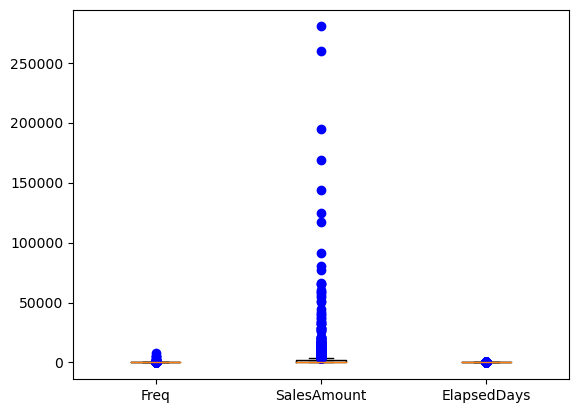

In [14]:
# 기본 데이터를 통해서 데이터의 분포도 1차 검사
# 박스 플롯 그림으로 조사
# 데이터가 특정 부분에 치우쳐 진 정도를 알아보기

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.boxplot([customer_df["Freq"],customer_df["SalesAmount"], customer_df["ElapsedDays"]], sym="bo")
plt.xticks([1,2,3], ["Freq", "SalesAmount", "ElapsedDays"])
plt.show()

# 결과적으로 박스가 아래쪽으로 찌그러져 있고, 분포도가 골고루 분포가 안 되어 있음 -> 조정이 필요


In [15]:
# 데이터 분포도를 고르게 할 방법 -> 로그함수 이용
# 정규화 하기 : 데이터의 기준, 척도가 다 달라서, 집계 하기 어렵다. 
# 정규화, 평균 : 0, 표준편차 : 1, 기준을 동일하게 변경하는 작업.

import numpy as np

# 값의 범위가 제각각 달라서 분포 기준이 한쪽으로 치우쳐짐
# 그래서 로그합수를 이용해서 해당 값들을 비숫한 기준으로 변경하기
# 로그 함수값으로 스케일링 작업 (마치 정규화 거의 비슷한 작업)
customer_df["Freq_log"] = np.log1p(customer_df["Freq"])
customer_df["SalesAmount_log"] = np.log1p(customer_df["SalesAmount"])
customer_df["ElapsedDays_log"] = np.log1p(customer_df["ElapsedDays"])
customer_df.head()



,CustomerID,Freq,SalesAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log
0,12346,1,77183.60,326,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,3.465736,7.494564,4.343805
3,12349,73,1757.55,19,4.304065,7.472245,2.995732
4,12350,17,334.40,311,2.890372,5.815324,5.743003


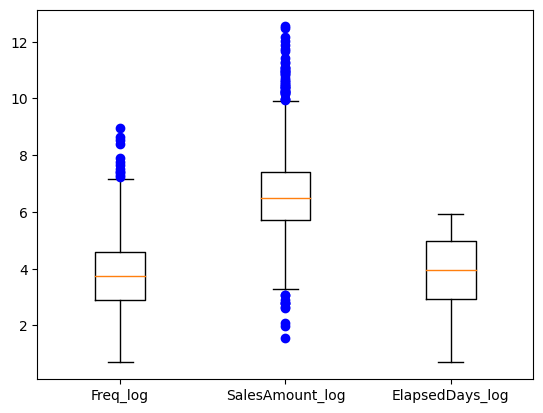

In [16]:
# 기본 데이터 통해서, 데이터 분포도를 1차 검사
# 박스 플롯 그림으로 , 조사. 
# 데이터가 특정 부분에 치우처 진 정도를 알아보기. 
import matplotlib.pyplot as plt 
import seaborn as sns 

fig, ax = plt.subplots()
ax.boxplot([customer_df["Freq_log"], customer_df["SalesAmount_log"], customer_df["ElapsedDays_log"]],sym="bo")
plt.xticks([1,2,3], ["Freq_log", "SalesAmount_log","ElapsedDays_log"])
plt.show()

In [17]:
# 데이터 분포도를 스키일링 -> 로그함수 이용해서 기준값의 분포를 적절히 조절하고 k평균 군집합을 불러와서 모델을 학습하고 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = customer_df[["Freq_log", "SalesAmount_log", "ElapsedDays_log"]].values


In [36]:
# 정규화 작업 하기
from sklearn.preprocessing import StandardScaler
# StandardScaler 모듈을 이용해서 정규화 학습 시키기
X_features_scaled = StandardScaler().fit_transform(X_features)

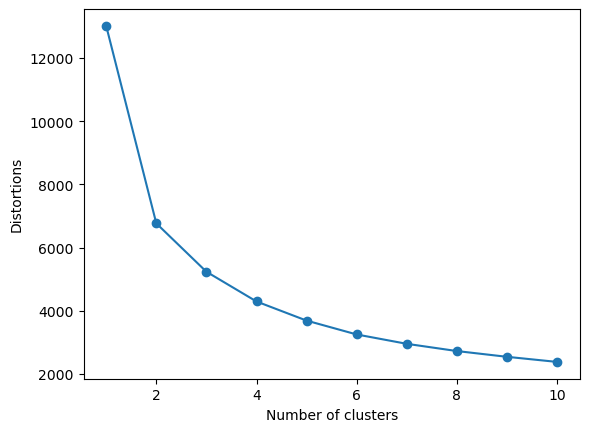

In [37]:
# 클러스터(군, 집합) 분류기준 및 몇개의 그룹으로 나누는게 최적인지를 판단하기 어려워 엘보 방법을 이용하서 k값 후보군을 구해서 임시로 몇개를 선택하기
# 그래프를 이용해서 어느 부분에서 그래프가 꺾이는지 확인 (팔꿈치 모양...)

# 선이 꺾이는 부분은 왜곡 : distortions -> 몇개의 그룹으로 나누는 기준이 될 후보

distortions = []

for i in range (1,11):
  # 모델을 생성하는 방법 : 1 ~ 10개까지 구성해서 데스트 해 볼 예정
  kmeans_i = KMeans(n_clusters=i, random_state=0)
  kmeans_i.fit(X_features_scaled)
  distortions.append(kmeans_i.inertia_)

plt.plot(range(1,11), distortions, marker= "o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortions")
plt.show()


In [38]:
# 엘보방법으로 몇개의 그룹으로 나눌지 여부 후보군을 그래프로 판단해서 임의로 3,4,5라고 가정해 보고 다시 학습시키기

# 그룹을 3개의 그룹으로 해서 모델 샌성
kmeans = KMeans(n_clusters=3, random_state=0)

# 생성된 모델을 기준으로 x 값 을이용해서 예측값을 구하고, 
Y_labels = kmeans.fit_predict(X_features_scaled)

# 구한 예측값을 기존의 데이터프레임에 , 새컬럼으로 추가하기. 
customer_df["Clusterlabel"] = Y_labels
customer_df.head()

,CustomerID,Freq,SalesAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log,Clusterlabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,2
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,1
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,2
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,2
4,12350,17,334.40,311,2.890372,5.815324,5.743003,0


In [39]:
# k=3일때, 판단 기준은 엘보 방법으로 판단을 했고,
# 확인차 k = 4,5,6 확인해 볼 예정
# 최적의 클러스터 수라고 가정하에 그래프를 그려서 데이터가 얼마나 분포가 고르게 나타나는지 확인
# 그래프 그리는 함수는 기존 코드를 재사용

from matplotlib import cm 

def silhouetteViz(n_clusters, X_features):
  kmeans = KMeans(n_clusters= n_clusters, random_state=0)
  Y_labels = kmeans.fit_predict(X_features)

  # 실루엣 값을 비교하기, 응집도, 분리도 차를 해당 최대값으로 나눈 비율
  # -1 과 1 사이의 값이 였고, 최종적으로 1에 가가울 수록 성능이 좋다

# euclidean 분리도에서 거리 측정 유클리드 거리의 계산을 이용
  silhouette_values = silhouette_samples(X_features,Y_labels,metric="euclidean")
  y_ax_lower, y_ax_upper = 0, 0 
  y_ticks = []

  for c in range(n_clusters):
    c_silhouettes = silhouette_values[Y_labels == c]
    c_silhouettes.sort()
    y_ax_upper += len(c_silhouettes)
    color = cm.jet(float(c)/ n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height=1.0, edgecolor = "none", color = color)
    y_ticks.append((y_ax_lower+y_ax_upper)/ 2.)
    y_ax_lower += len(c_silhouettes)
  
  silhouette_avg = np.mean(silhouette_values)
  plt.axvline(silhouette_avg, color="red", linestyle ="--")
  plt.title('Number of Cluster : '+str(n_clusters) + '\n' + 'silhouette_Score: ' + str(round(silhouette_avg,3) ))
  plt.yticks([0, 0.2, 0.4, 0.6, 0.8 , 1])
  plt.ylabel("Cluster")
  plt.xlabel("silhouette coefficient")
  plt.tight_layout()
  plt.show()

  

In [40]:
# 클러스터의 데이터 분포를 확인하기 위한 스캐터 차트 확인. 

def clusterScatter(n_clusters, X_features):
  c_colors = []
  kmeans = KMeans(n_clusters= n_clusters, random_state=0)
  Y_labels = kmeans.fit_predict(X_features)

  for i in range(n_clusters):
    c_color = cm.jet(float(i) / n_clusters)
    c_colors.append(c_color)

    # 클러스터의 데이터 분포를 동그라미로 시각화 
    plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1], marker="o", color = c_color, edgecolor = "black", s = 50 , label = 'cluster ' + str(i))

  # 각 클러스터 중심점을 삼각형으로 표시. 
  for i in range(n_clusters):
    plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], marker="^", color = c_colors[i], edgecolor="w", s = 200 )
    
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

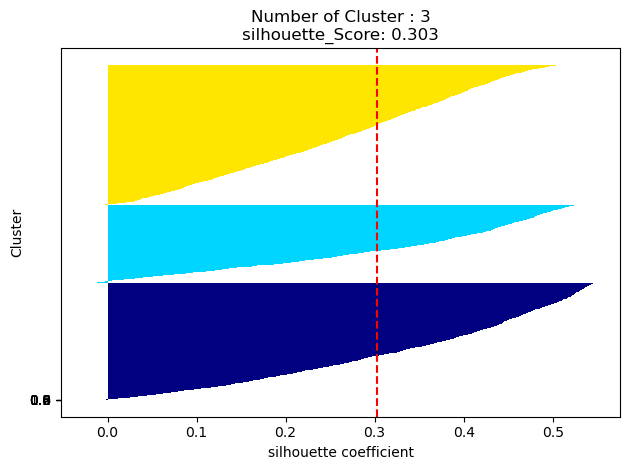

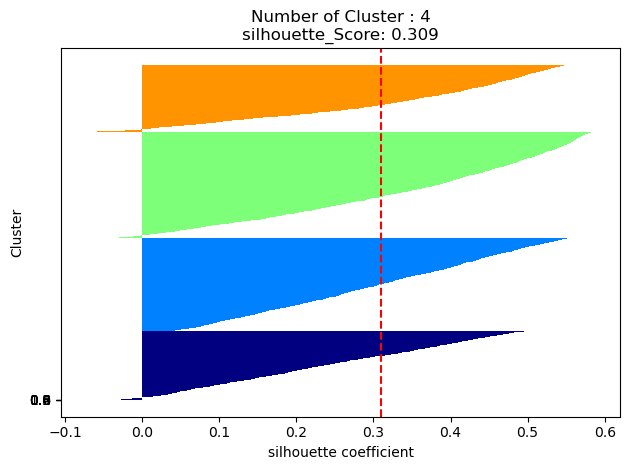

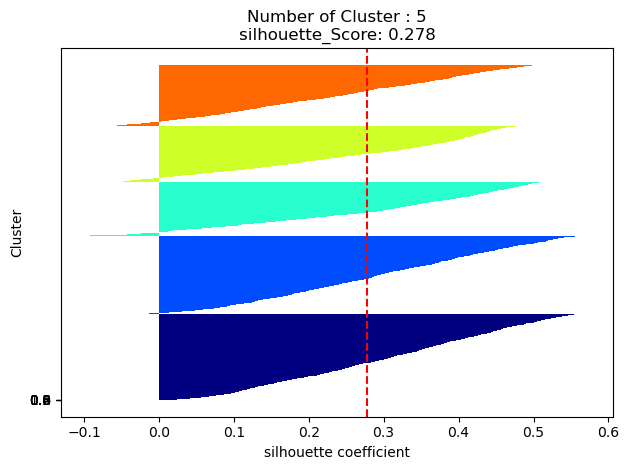

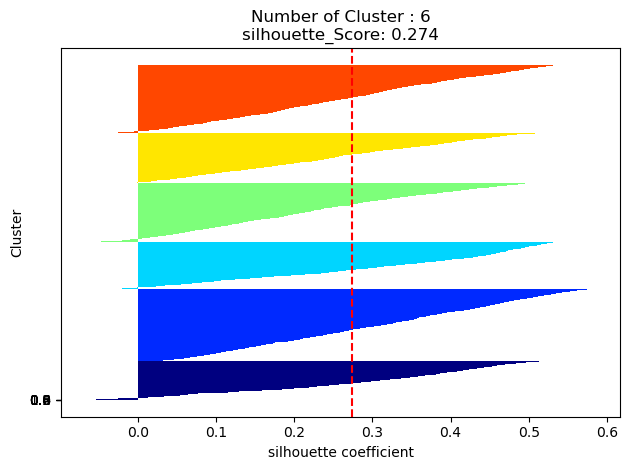

In [41]:
# 그래프 그리기. 
# 실루엣 계수, 비중  비교하기. 
silhouetteViz(3,X_features_scaled)
silhouetteViz(4,X_features_scaled)
silhouetteViz(5,X_features_scaled)
silhouetteViz(6,X_features_scaled)

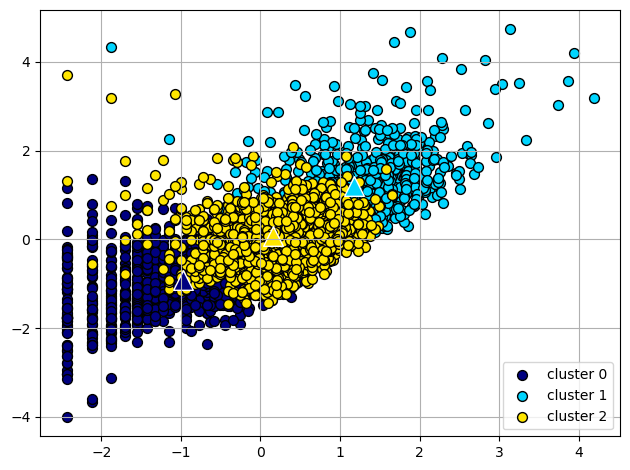

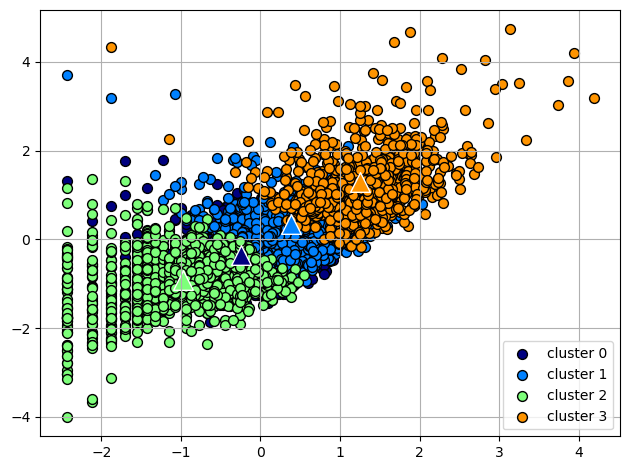

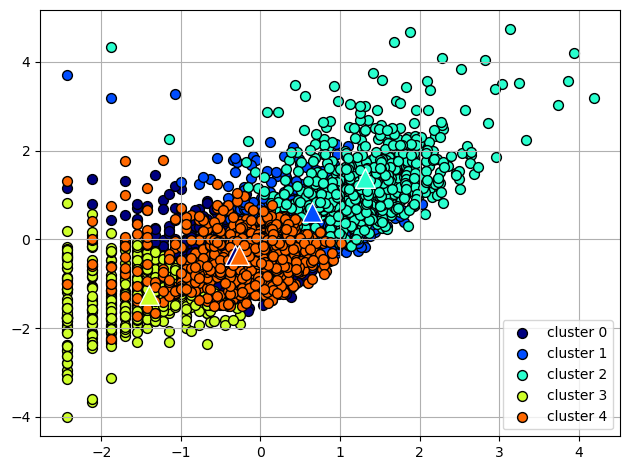

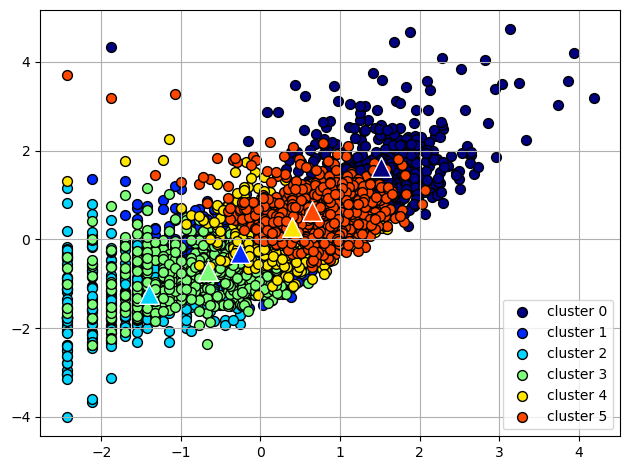

In [42]:
# 데이터 분포 그리기 
clusterScatter(3,X_features_scaled)
clusterScatter(4,X_features_scaled)
clusterScatter(5,X_features_scaled)
clusterScatter(6,X_features_scaled)

In [44]:
# 결론 :  실루엣 계수와 데이터 분포도를 확인해서 대략적으로 k=4개일때, 4개의 그룹으로 나누었을 때 가장 데이터가 고르게 분포가 되어 있음
# 그래서 k=4일때 기준으로 모델을 학습시켜 원하는 결과를 도출

best_cluster = 4
# 최적 클러스터 값을 이용해서, 모델생성
kmeans = KMeans(n_clusters=best_cluster, random_state=0)
# 모델 이용해서, 예측 값 구함.
Y_labels = kmeans.fit_predict(X_features_scaled)

In [50]:
customer_df["ClusterLabel"] = Y_labels
customer_df.head()

,CustomerID,Freq,SalesAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log,Clusterlabel,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,2,1
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,1,3
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,2,1
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,2,1
4,12350,17,334.40,311,2.890372,5.815324,5.743003,0,2


In [52]:
# csv 파일로 결과값 저장
customer_df.to_csv("./Online_Retail_Result.xlsx")

# 모델이 완성이 됨. 


In [57]:
customer_df.groupby("ClusterLabel")["CustomerID"].count()

ClusterLabel
0     891
1    1207
2    1368
3     872
Name: CustomerID, dtype: int64

In [58]:
# 전체 고객 약 4,338 명중에서 891 명이 0 번 그룹,
# 1207 명이 1번 그룹 
# 1368 명 2번 그룹
# 872 명 3번 그룹
customer_cluster_df = customer_df.drop(["Freq_log","SalesAmount_log","ElapsedDays_log"], axis=1, inplace=False)


In [59]:
# 각 고객 클러스터 별 , 1회당 평균 구매액. 
customer_cluster_df["SalesAmountAvg"] = customer_cluster_df["SalesAmount"] / customer_cluster_df["Freq"]
customer_cluster_df.head() 

,CustomerID,Freq,SalesAmount,ElapsedDays,Clusterlabel,ClusterLabel,SalesAmountAvg
0,12346,1,77183.60,326,2,1,77183.600000
1,12347,182,4310.00,3,1,3,23.681319
2,12348,31,1797.24,76,2,1,57.975484
3,12349,73,1757.55,19,2,1,24.076027
4,12350,17,334.40,311,0,2,19.670588


In [60]:
# 컬럼 다듬기 
customer_cluster_df.drop(["CustomerID"], axis=1, inplace=False).groupby("ClusterLabel").mean()

,Freq,SalesAmount,ElapsedDays,Clusterlabel,SalesAmountAvg
ClusterLabel,,,,,
0,37.811448,603.494053,20.888889,1.640853,32.256335
1,79.195526,1506.813034,96.000829,1.887324,102.998219
2,15.052632,298.748151,188.111842,0.021930,43.338802
3,278.464450,7020.739553,13.612385,1.002294,96.665836
